### Loading necessary packages

In [2]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn import preprocessing 
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedBaggingClassifier
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

### Exploratory Data Analysis

In [5]:
#Load Dataset
df = pd.read_excel("Copper_Set.xlsx")

In [6]:
#Exploring data
print("No. of Rows :",df.shape[0])
print("No. of Columns :",df.shape[1])

No. of Rows : 181673
No. of Columns : 14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [8]:
#Number of null values
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [9]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [10]:
df.tail()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,20200702.0,406.686538,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,20200701.0,607.0


In [11]:
#Exploring features
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [12]:
#Copying dataframe
df_new = df.copy()

### Data Cleaning

In [13]:
#Handling nan values in id and itemdate
df_new.loc[26,'id']='ABC001'
df_new.loc[104566,'id']='ABC002'
df_new['item_date'].fillna(method='ffill',inplace=True)

#Filling missing customer by exploring similar transaction by application,thickness,product reference,country using
#(df_new.loc[(df_new['product_ref']==1670798778)&(df_new['country']==39.0)&(df_new['application']==10.0)&(df_new['thickness']==3.5))
df_new.loc[104684,'customer']=30353798.0

#Handling null values in country
df_new.loc[104936,'country']=84.0
df_new.loc[104959,'country']=27.0
df_new.loc[105055,'country']=27.0
df_new['country'].fillna(method='ffill',inplace=True)

#Handling null values in thickness with similar selling price,thickness,application,product reference
#df_new.loc[(df_new['product_ref']==1332077137 )&(df_new['width']==1500.0)&(df_new['application']==10.0)
#&(df_new['customer']==30205825.0)&(df_new['selling_price']<=704.0)]
df_new.loc[104895,'thickness']=0.80

#Handling null values in delivery date
#df_new.loc[(df_new['customer']==30349338.0)&(df_new['product_ref']==611993)&(df_new['item_date']==20201112.0)]
df_new.loc[104761,'delivery date']=20210101.0

#Replacing improper item date with proper value
df_new.loc[52,'item_date']= '20210401.0'
df_new.loc[105485,'item_date']='20201111.0'

#Replacing invalid float value in quantity tons with 7approximate value found using similar row in index 177452 using
#formula (price/ton=sellingprice/quantity tons)
#df_new.loc[(df_new['application']== 41.0)&(df_new['width']== 1000.0)&(df_new['thickness']==0.5)&(df_new['country']==78.0)&(df_new['selling_price']<680)]

df_new.loc[173086,'quantity tons']='80.35050177293934'

#Handling improper values in delivery date
df_new.loc[58,'delivery date']=20210101.0

#Finding equivalent date with similar customer base
#df.loc[(df['customer']==30350566.0)&(df['width']==1250.0)&(df['product_ref']==611993)&(df['item_date']==20201112.0)]
df_new.loc[105421,'delivery date']=20210101.0


#Handling outliers
##Replacing quantity tons 1000000000.00 in 173022 index with 79.63 based on similar value from index 163026
#df_new.loc[df_new['quantity tons']>999999999.00]

df_new.loc[173022,'quantity tons']='79.631259' 

#Replacing quantity tons 50000000.0 in 173211 index with  mean value 5.55 by slicing with similar data
# df1=df_new.loc[(df_new['customer']=='30200964')&(df_new['application']=='41')&(df_new['width']==1245.0)&(df_new['thickness']==0.88)
#               &(df_new['item_date']<'2020-08-01')&(df_new['quantity tons']!=50000000.00)]
# df1.describe().apply(lambda x: x.apply('{0:.2f}'.format))


df_new.loc[173211,'quantity tons']='5.546182'

#Replacing quantity tons with -2000.0 in 181671 to similar value in index 180585
# df_new.loc[(df_new['product_ref']=='164141591')&(df_new['application']=='41')&(df_new['width']==1250.0)&(df_new['thickness']<=0.88)
#                &(df_new['item_date']<'2020-08-01')&(df['country']==25.0)]

df_new.loc[181671,'quantity tons']= '20.877025'


# df1 = df_new.loc[(df_new['product_ref']=='164141591')&(df_new['application']=='41')&(df_new['width']==1220.0)&(df_new['thickness']==0.84) 
#                 &(df_new['quantity tons']!=-18.00)]
# df1['quantity tons'].mean()
df_new.loc[181661,'quantity tons'] = '281.920396'

# df1 = df_new.loc[(df_new['product_ref']=='1332077137')&(df_new['application']=='15')&(df_new['width']==1500.0)&(df_new['thickness']==1.5) 
#                 &(df_new['quantity tons']!=-4.0)]
# df1['quantity tons'].mean()
df_new.loc[105730,'quantity tons']='34.098216'

#Looks like typo error (-1.476794) on comparing with index 122843
df_new.loc[131473,'quantity tons']= '1.476794'
                                                   
#Handling improper value like 0000000000000104991 in material_ref
df_new['material_ref']=df_new['material_ref'].astype(str)
df_new['material_ref']=df_new['material_ref'].map(lambda x : int(x) if x[0:9]=='000000000' else x)

#Handling improper values like 1000000491 in selling price
df_new.loc[36192,'selling_price']=1112.0

#Replacing selling price with similar value in index 10224
# df_new.loc[(df_new['product_ref']=='1721130331')&(df_new['application']=='56')&(df_new['width']==1254.0)
#                 &(df_new['selling_price']!=100000941.0)]
df_new.loc[10228,'selling_price']=13.0

#Handling negative values to positive in selling price as on analysis looks like typo-error
df_new['selling_price']=df_new['selling_price'].abs()

#Handling outlier in selling price 81236.14 with mean value similar datas
# df1 = df_new.loc[(df_new['product_ref']=='611993')&(df_new['application']=='41')&(df_new['width']==1250.0)&(df_new['thickness']==0.5)
#                 &(df_new['country']=='84')&(df_new['quantity tons']<=5.0)&(df_new['selling_price']!=81236.14)]
# df1['selling_price'].mean()
df_new.loc[123570,'selling_price']=1087.06

#Handling outlier in selling price 10913.00 with mean value similar datas
# df1 = df_new.loc[(df_new['product_ref']=='611993')&(df_new['application']=='10')&(df_new['width']==1000.0)&(df_new['thickness']==0.75)
#                 &(df_new['country']=='32')&(df_new['quantity tons']>=9.0)&(df_new['quantity tons']<10.0)&(df_new['selling_price']!=10913.0)]
# df1['selling_price'].mean()
df_new.loc[124547,'selling_price']=992.5


#Handling outlier in thickness of 2500.0 with mean of similar values
# df1 = df_new.loc[(df_new['product_ref']=='1670798778')&(df_new['application']=='41')&(df_new['width']==1260.0)
#                 &(df_new['country']=='25')&(df_new['thickness']!=2500.0)]
# df1['thickness'].mean()
df_new.loc[41,'thickness']=3.5

#Replacing selling price 0.00 of row index 41 with mean of similar values
df_new.loc[41,'selling_price']=715.11

#Replacing selling price 0.00 of row index 45358 with mean of similar values
# df1 = df_new.loc[(df_new['product_ref']=='1670798778')&(df_new['application']=='59')&(df_new['width']==1300.0)
#                 &(df_new['country']=='26')&(df_new['selling_price']!=0.0)&(df_new['quantity tons']<50.0)
# &(df_new['thickness']==2.0)]
# df1['selling_price'].mean()
df_new.loc[45358,'selling_price']=853.66


#Replacing selling price 0.00 of row index 45505 with mean of similar values
# df1 = df_new.loc[(df_new['product_ref']=='611993')&(df_new['application']=='41')&(df_new['width']==1500.0)
#                 &(df_new['country']=='28')&(df_new['quantity tons']<100)&(df_new['quantity tons']>90)&(df_new['selling_price']!=0.1)]
# df1['selling_price'].mean()
df_new.loc[45505,'selling_price'] =900.20

#Handling outlier of 400.0 in thickness
# df1 = df_new.loc[(df_new['product_ref']=='1670798778')&(df_new['application']=='15')&(df_new['width']==1500.0)
#                 &(df_new['country']=='84')&(df_new['quantity tons']<54)&(df_new['quantity tons']>53)&(df_new['thickness']!=400.0)]
# df1['thickness'].mean()
df_new.loc[45001,'thickness']=7.0

#Replacing quantity tons with -2000.0 in 100260 to similar value mean
# df1 = df_new.loc[(df_new['product_ref']=='164141591')&(df_new['application']=='10')&(df_new['width']==1127.0)
#                 &(df_new['country']=='26')&(df_new['quantity tons']<70000)&(df_new['thickness']==1.7)]
# df1['quantity tons'].mean()
df_new.loc[100260,'quantity tons']='9006.587387'

#Handling Selling price outliers
# df1 = df_new.loc[(df_new['product_ref']=='611993')&(df_new['application']=='41')&(df_new['width']==1050.0)
#                 &(df_new['country']=='78')&(df_new['thickness']==0.50)&(df_new['selling_price']<8000)]
# df1['selling_price'].mean()
df_new.loc[159869,'selling_price']=920.58
df_new.loc[153215,'selling_price']=920.58

# df1 = df_new.loc[(df_new['product_ref']=='611993')&(df_new['application']=='41')&(df_new['width']==1500.0)
#                 &(df_new['country']=='78')&(df_new['thickness']==1.15)&(df_new['selling_price']<8000)&(df_new['quantity tons']>7.0)
#                                                                                                       &(df_new['quantity tons']<20.0)]
# df1['selling_price'].mean()

df_new.loc[76871,'selling_price']=843.38
df_new.loc[113918,'selling_price']=843.38
df_new.loc[116445,'selling_price']=843.38
df_new.loc[141122,'selling_price']=843.38




### Datatype Conversion

In [14]:
#Datatype conversion
df_new['item_date']=pd.to_datetime(df_new['item_date'], format='%Y%m%d')
df_new['quantity tons']=pd.to_numeric(df_new['quantity tons'])
df_new['customer']=df_new['customer'].convert_dtypes().astype(str)
df_new['country']=df_new['country'].convert_dtypes().astype(str)
df_new['product_ref']=df_new['product_ref'].astype(str)
df_new['application']=df_new['application'].convert_dtypes().astype('str')
df_new['delivery date']=pd.to_datetime(df_new['delivery date'], format='%Y%m%d')
df_new['thickness']=df_new['thickness']
df_new['selling_price']=df_new['selling_price']


### Feature Enhancement

In [15]:
#new columns from item_date and delivery date 
df_new['item_year'] = df_new['item_date'].dt.year
df_new['delivery_year'] = df_new['delivery date'].dt.year
df_new['delivery_month'] = df_new['delivery date'].dt.month
df_new['item_month'] = df_new['item_date'].dt.month
df_new['item_year_month'] = df_new['item_date'].apply(lambda x:x.strftime('%Y%m'))
df_new['delivery_year_month'] = df_new['delivery date'].apply(lambda x:x.strftime('%Y%m'))

In [16]:
df_new['item_year_month']=df_new['item_year_month'].astype(str)
df_new['delivery_year_month']=df_new['delivery_year_month'].astype(str)

In [17]:
#Checking null values after handling
df_new.isnull().sum()

id                     0
item_date              0
quantity tons          0
customer               0
country                0
status                 2
item type              0
application            0
thickness              0
width                  0
material_ref           0
product_ref            0
delivery date          0
selling_price          1
item_year              0
delivery_year          0
delivery_month         0
item_month             0
item_year_month        0
delivery_year_month    0
dtype: int64

### Handling null values and Outliers

In [18]:
#Dropping null values

#Dropping material reference column
df_new.drop('material_ref',axis='columns',inplace=True)

#Dropping null values rows 
df_new.dropna(subset=['application'], inplace=True)

df_new.dropna(subset=['status','selling_price'],inplace=True)


In [19]:
###Treating outliers by winsorizing
df_new['quantity tons'] = winsorize(df_new['quantity tons'],(0.0001,0.0001))
df_new['width'] = winsorize(df_new['width'],(0.0001,0.0001))
df_new['selling_price'] = winsorize(df_new['selling_price'],(0.01,0.01))


In [20]:
print("Total number of rows dropped :", df.shape[0]-df_new.shape[0])

Total number of rows dropped : 3


In [21]:
#Copying df_new for classifier model
df_class = df_new.copy()

In [22]:
#Copying df_new for regression model
df_reg = df_new.copy()

In [31]:
with open('df_class.pkl','wb') as f:
    pickle.dump(df_class,f)

In [45]:
df_class = pd.read_pickle('df_class.pkl')

### Regression Model

In [23]:
df_reg.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_year,delivery_year,delivery_month,item_month,item_year_month,delivery_year_month
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308,28,Won,W,10,2.00,1500.0,1670798778,2021-07-01,854.00,2021,2021,7,4,202104,202107
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938,25,Won,W,41,0.80,1210.0,1668701718,2021-04-01,1047.00,2021,2021,4,4,202104,202104
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963,30,Won,WI,28,0.38,952.0,628377,2021-01-01,644.33,2021,2021,1,4,202104,202101
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574,32,Won,S,59,2.30,1317.0,1668701718,2021-01-01,768.00,2021,2021,1,4,202104,202101
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560,28,Won,W,10,4.00,2000.0,640665,2021-03-01,577.00,2021,2021,3,4,202104,202103


### Univariate Analysis

In [192]:
#Selecting numerical columns
numerical_columns = df_reg.select_dtypes(include=np.number).columns.to_list()
df_numerical = df_reg.select_dtypes(include=np.number)
df_numerical

,quantity tons,thickness,width,selling_price,item_year,delivery_year,delivery_month,item_month
0,54.151139,2.00,1500.0,854.00,2021,2021,7,4
1,768.024839,0.80,1210.0,1047.00,2021,2021,4,4
2,386.127949,0.38,952.0,644.33,2021,2021,1,4
3,202.411065,2.30,1317.0,768.00,2021,2021,1,4
4,785.526262,4.00,2000.0,577.00,2021,2021,3,4
...,...,...,...,...,...,...,...,...
181668,102.482422,0.96,1220.0,591.00,2020,2020,7,7
181669,208.086469,0.95,1500.0,589.00,2020,2020,7,7
181670,4.235594,0.71,1250.0,619.00,2020,2020,7,7
181671,20.877025,0.85,1250.0,601.00,2020,2020,7,7


In [193]:
#Display describe without scientific notation
df_reg.describe().apply(lambda x: x.apply('{0:.6f}'.format))

,quantity tons,thickness,width,selling_price,item_year,delivery_year,delivery_month,item_month
count,181670.000000,181670.000000,181670.000000,181670.000000,181670.000000,181670.000000,181670.000000,181670.000000
mean,94.316272,2.548941,1295.284893,815.104984,2020.390235,2020.675015,5.747696,6.722866
std,362.785583,2.827289,261.602062,221.316482,0.487804,0.468500,3.426525,3.957381
min,0.011213,0.180000,20.500000,18.000000,2020.000000,2019.000000,1.000000,1.000000
25%,10.970680,0.700000,1180.000000,669.000000,2020.000000,2020.000000,3.000000,3.000000
50%,30.364996,1.500000,1250.000000,812.000000,2020.000000,2021.000000,6.000000,8.000000
75%,67.161068,3.000000,1500.000000,953.000000,2021.000000,2021.000000,9.000000,10.000000
max,15539.760295,25.500000,2150.000000,1373.000000,2021.000000,2022.000000,12.000000,12.000000


<Figure size 640x480 with 0 Axes>

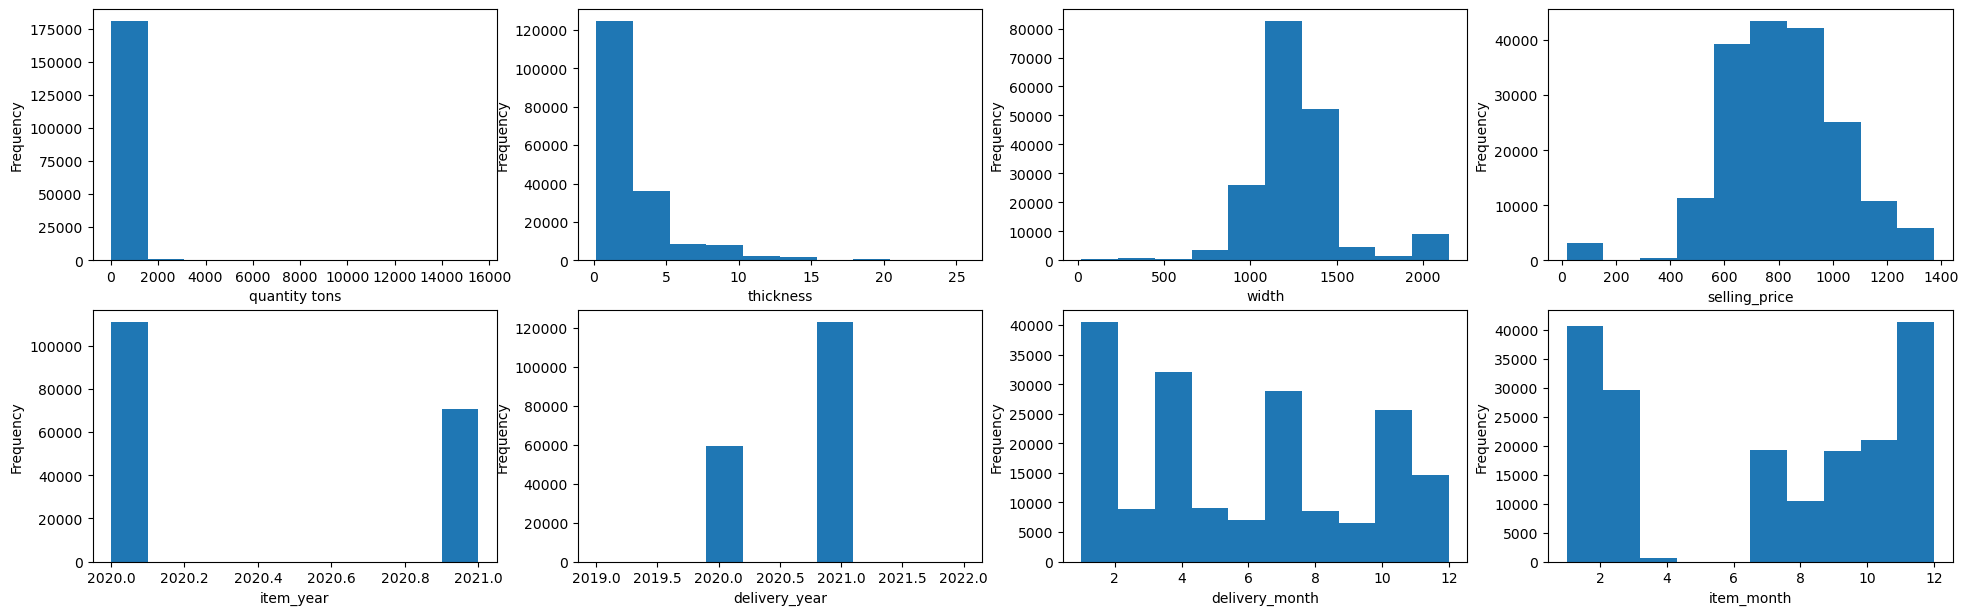

In [194]:
#Histogram Visualization
fig = plt.figure()
fig = plt.figure(figsize=(24, 15))
for i in range(len(numerical_columns)):
    var = numerical_columns[i]
    sub = fig.add_subplot(4,4, i + 1)
    sub.set_xlabel(var)
    df_numerical[var].plot(kind = 'hist')

<Figure size 640x480 with 0 Axes>

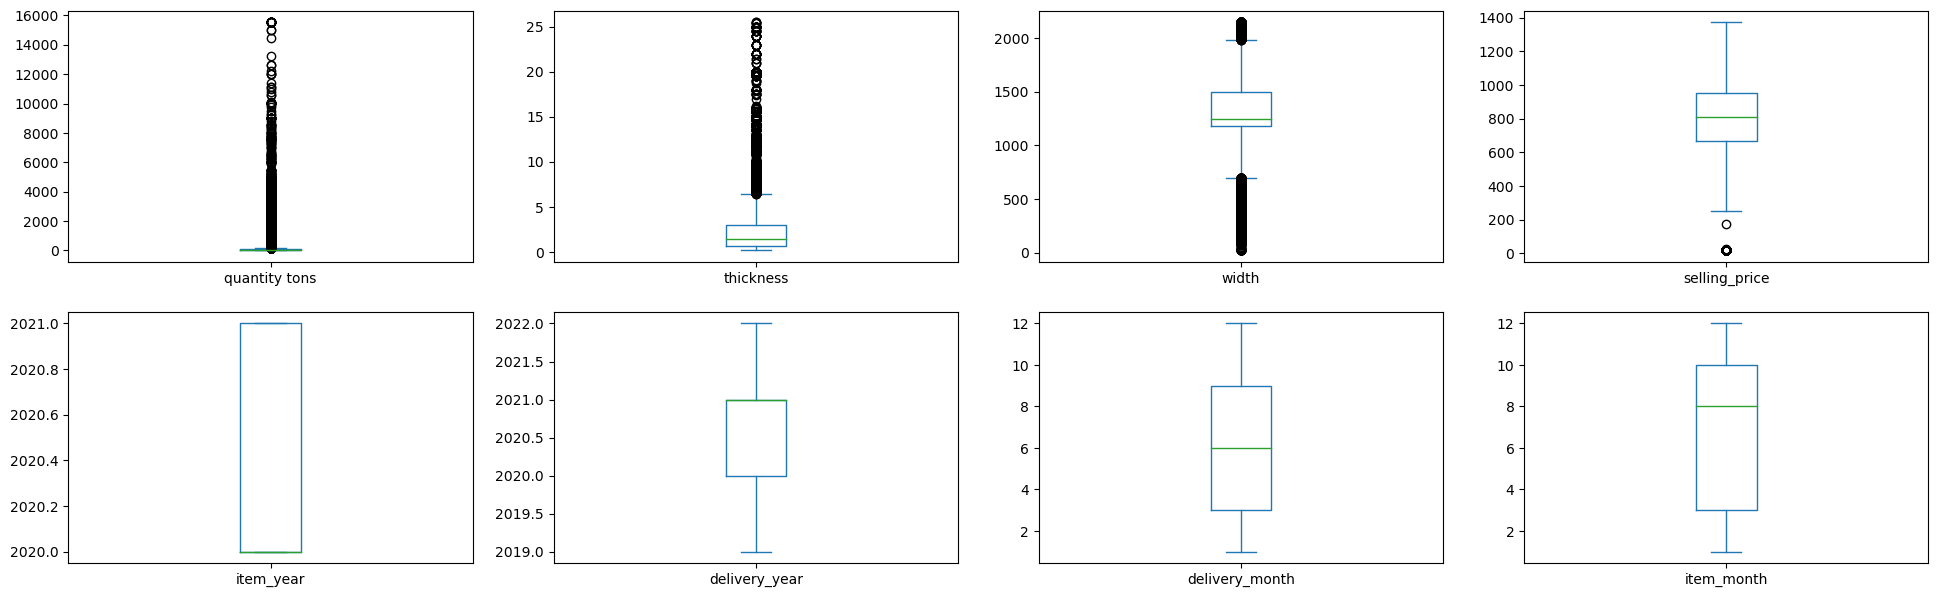

In [195]:
#Boxplot Visualization
fig = plt.figure()
fig = plt.figure(figsize=(24, 15))
for i in range(len(numerical_columns)):
    var = numerical_columns[i]
    sub = fig.add_subplot(4,4, i + 1)
    df_numerical[var].plot(kind = 'box')

### Bi-variate Analysis

In [196]:
scatter_columns=['quantity tons', 'customer', 'country', 'status', 'item type','application', 'thickness', 'width', 'product_ref',
       'item_year', 'delivery_year', 'delivery_month', 'item_month',
       'item_year_month', 'delivery_year_month']
df_final = df_new[['quantity tons', 'customer', 'country', 'status', 'item type','application', 'thickness', 'width', 'product_ref',
       'item_year', 'delivery_year', 'delivery_month', 'item_month',
       'item_year_month', 'delivery_year_month']]
len(df_final.columns)

15

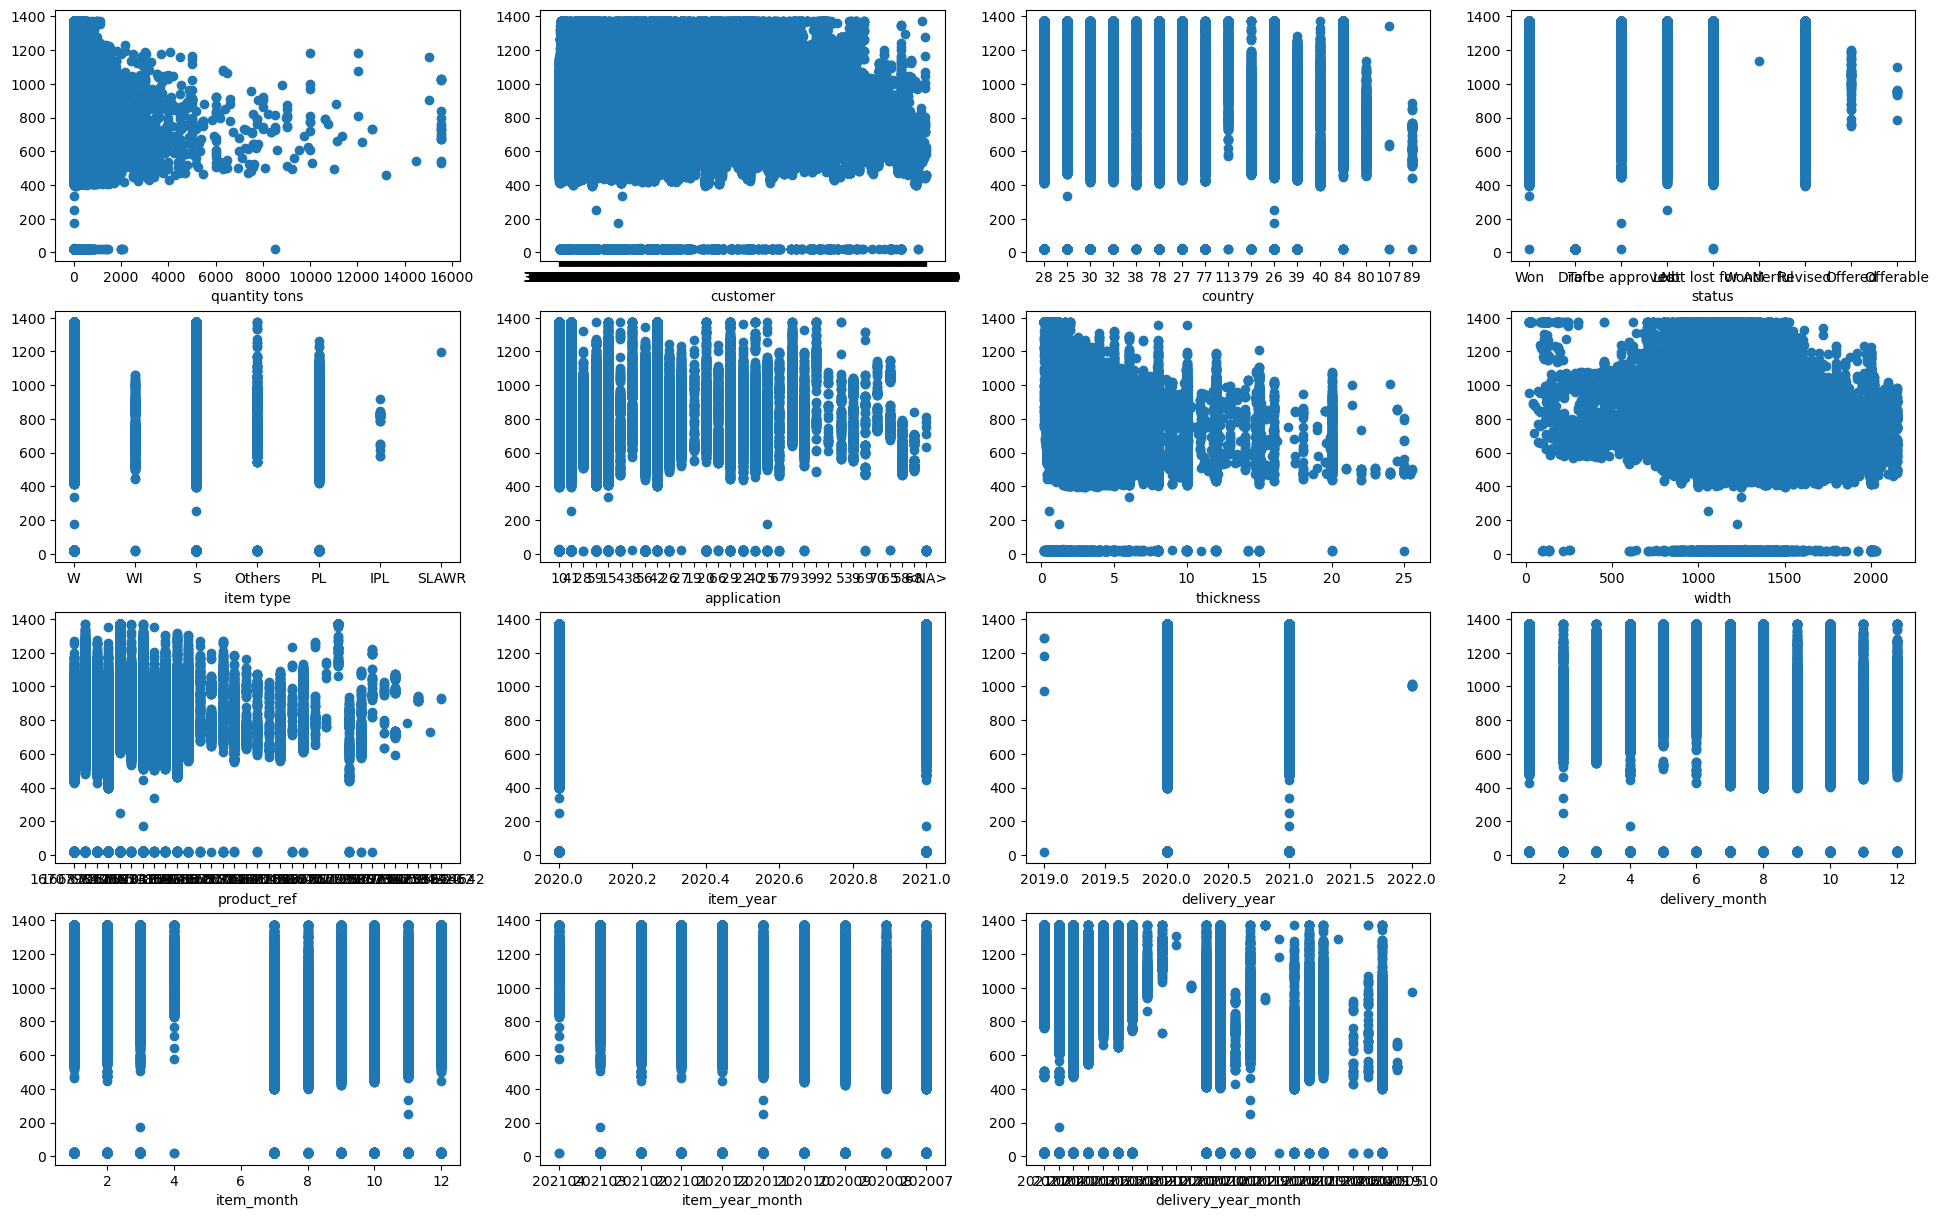

In [197]:
#Scatter Plot chart
fig = plt.figure(figsize=(24, 15))
for i in range(len(scatter_columns)):
    var = df_new[scatter_columns[i]]
    sub = fig.add_subplot(4,4, i + 1)
    sub.set_xlabel(scatter_columns[i])
    plt.scatter(var,df_new['selling_price'])

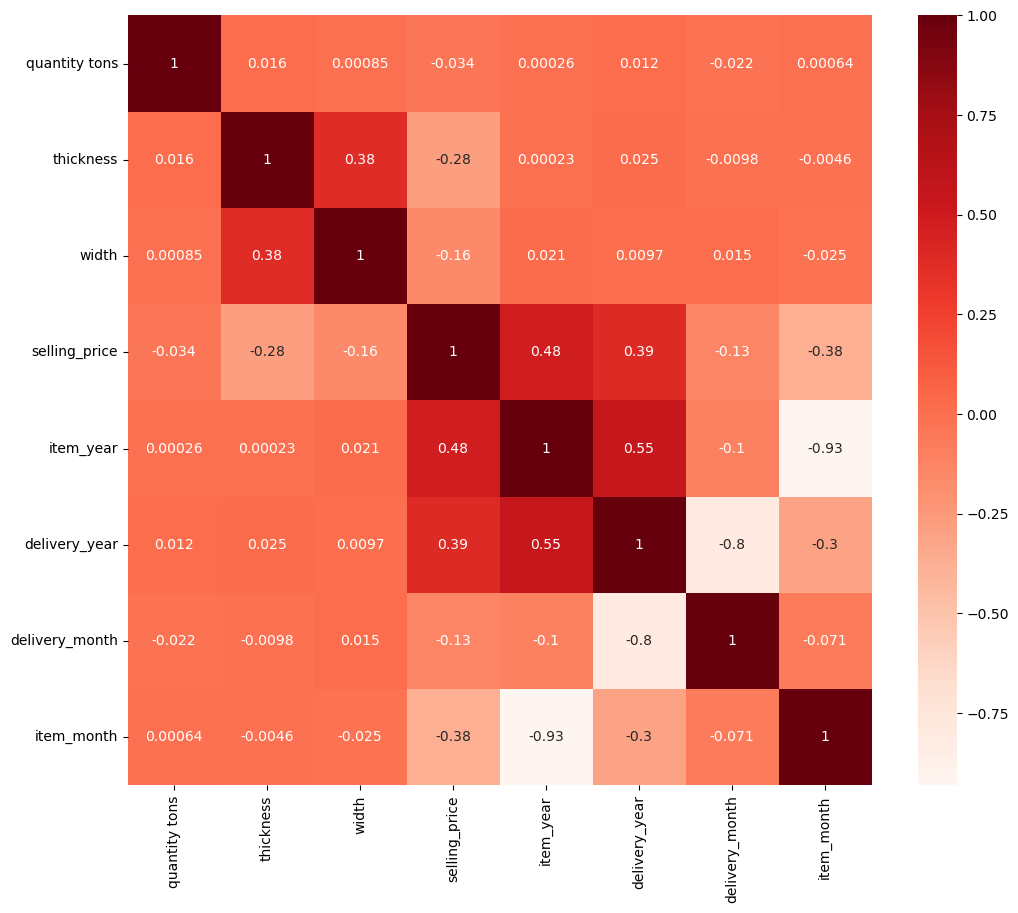

In [199]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### One-hot and Label Encoding

In [24]:
#Instantiating Label Encoder
le = preprocessing.LabelEncoder()

In [25]:
#Label Encoding Country
df_reg['country']= le.fit_transform(df_reg['country'])
print(dict(zip(le.classes_,range(len(le.classes_)))),end="")

{'107': 0, '113': 1, '25': 2, '26': 3, '27': 4, '28': 5, '30': 6, '32': 7, '38': 8, '39': 9, '40': 10, '77': 11, '78': 12, '79': 13, '80': 14, '84': 15, '89': 16}

In [26]:
#Label Encoding item type
df_reg['item type']= le.fit_transform(df_reg['item type']) 
print(dict(zip(le.classes_,range(len(le.classes_)))),end="")


{'IPL': 0, 'Others': 1, 'PL': 2, 'S': 3, 'SLAWR': 4, 'W': 5, 'WI': 6}

In [27]:
#Label Encoding application
df_reg['application']= le.fit_transform(df_reg['application']) 
print(dict(zip(le.classes_,range(len(le.classes_)))),end="")

{'10': 0, '15': 1, '19': 2, '2': 3, '20': 4, '22': 5, '25': 6, '26': 7, '27': 8, '28': 9, '29': 10, '3': 11, '38': 12, '39': 13, '4': 14, '40': 15, '41': 16, '42': 17, '5': 18, '56': 19, '58': 20, '59': 21, '65': 22, '66': 23, '67': 24, '68': 25, '69': 26, '70': 27, '79': 28, '99': 29, '<NA>': 30}

In [28]:
#Label Encoding product Reference
df_reg['product_ref']= le.fit_transform(df_reg['product_ref']) 
print(dict(zip(le.classes_,range(len(le.classes_)))),end="")


{'1282007633': 0, '1332077137': 1, '164141591': 2, '164336407': 3, '164337175': 4, '1665572032': 5, '1665572374': 6, '1665584320': 7, '1665584642': 8, '1665584662': 9, '1668701376': 10, '1668701698': 11, '1668701718': 12, '1668701725': 13, '1670798778': 14, '1671863738': 15, '1671876026': 16, '1690738206': 17, '1690738219': 18, '1693867550': 19, '1693867563': 20, '1721130331': 21, '1722207579': 22, '611728': 23, '611733': 24, '611993': 25, '628112': 26, '628117': 27, '628377': 28, '640400': 29, '640405': 30, '640665': 31, '929423819': 32}

In [29]:
#One-Hot Encoding item_type month
df_reg = pd.get_dummies(df_reg, columns = ['item_month'])   

In [30]:
# Splitting the independent and dependent variables

indep_var = df_reg.loc[:,['country','item type','application','product_ref','quantity tons','thickness', 'width','item_month_1', 'item_month_2', 'item_month_3', 'item_month_4',
       'item_month_7', 'item_month_8', 'item_month_9', 'item_month_10',
       'item_month_11', 'item_month_12']]
target = df_reg.loc[:,['selling_price']]

In [31]:
# standardization 
sc = StandardScaler()
scaled_data = sc.fit_transform(indep_var)

In [32]:
#Savig standard scaler
with open("\standard_scalar_regr.pkl",'wb') as f:
    pickle.dump(sc,f)

### Splitting dataset as Training,Validation and Testing

In [44]:
# Split data to train and test set
Xr=scaled_data
yr = target
X_trainr, Xr_, y_trainr, yr_ = train_test_split(Xr, yr, test_size=0.30, random_state=1)

In [45]:
# Split (test) to split and validation
X_valr, X_testr, y_valr, y_testr = train_test_split(Xr_, yr_, train_size=0.5)

In [46]:
#Function to return regression metrics
def reg_metrics(act,pred):
    print("Mean Squared Error: ", mean_squared_error(act,pred))
    print("Mean Absolute Error :", mean_absolute_error(act,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(act,pred)))
    print("R2 Score: ", r2_score(act,pred))

### Linear Regression

In [36]:
# FIT/TRAIN MODEL
reg = LinearRegression()
reg.fit(X_trainr, y_trainr)
# PREDICTIONS
y_pred_lin = reg.predict(X_valr)
reg_metrics(y_valr,y_pred_lin)

Mean Squared Error:  30369.50876304409
Mean Absolute Error : 115.78055391113595
Root Mean Squared Error:  174.26849618632764
R2 Score:  0.3765078495426265


### Decision Tree

In [37]:
#Regression Tree
tree = DecisionTreeRegressor()
tree.fit(X_trainr, y_trainr)
predt = tree.predict(X_valr)
reg_metrics(y_valr,predt)

Mean Squared Error:  16608.21125478899
Mean Absolute Error : 53.35124917431193
Root Mean Squared Error:  128.8728491761899
R2 Score:  0.6590300675821403


In [ ]:
#Setting parameters for grid search
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': range(1,10),
    'min_samples_leaf': [2, 4,6]
}
## creating instance
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_trainr, y_trainr)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

In [41]:
tree_grid = DecisionTreeRegressor(max_depth= None, min_samples_leaf= 6, min_samples_split= 10)
tree_grid.fit(X_trainr, y_trainr)
predtg = tree_grid.predict(X_valr)
reg_metrics(y_valr,predtg)

Mean Squared Error:  12599.014689557369
Mean Absolute Error : 54.304620240994474
Root Mean Squared Error:  112.24533259586953
R2 Score:  0.741339683044357


### Random Forest

In [42]:
randomf = RandomForestRegressor()
randomf.fit(X_trainr, y_trainr)



C:\Users\ACER\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [43]:
pred_rand = randomf.predict(X_valr)
reg_metrics(y_valr,pred_rand)

Mean Squared Error:  10030.731881574102
Mean Absolute Error : 45.88083144342507
Root Mean Squared Error:  100.15354153285895
R2 Score:  0.7940670479624481


In [ ]:
#Grid Search
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 
search = GridSearchCV(randomf, param_grid, cv=5).fit(X_trainr, (y_trainr.values.ravel()))

print("The best hyperparameters are ",search.best_params_)

### XGBoosRegressor

In [296]:
xgb_reg =XGBRegressor()
xgb_reg.fit(X_trainr, y_trainr)
pred_xgbr = xgb_reg.predict(X_valr)
reg_metrics(y_valr,pred_xgbr)

Mean Squared Error:  12651.875154538006
Mean Absolute Error : 57.28988833490914
Root Mean Squared Error:  112.48055456183529
R2 Score:  0.7393929269588502


In [ ]:
#Grid Search
param_grid ={"learning_rate" : (0.15,0.20),
                        "max_depth": [ 6, 8],
                        n_estimators": [700,800,900]}
                 
                        
search = GridSearchCV(xgb_reg, param_grid, cv=5).fit(X_trainr, y_trainr)

print("The best hyperparameters are ",search.best_params_)

In [298]:
xgb_best =XGBRegressor(learning_rate= 0.015, max_depth= 6, n_estimators= 700)
xgb_best.fit(X_trainr, y_trainr)
pred_xgbest = xgb_best.predict(X_valr)
reg_metrics(y_valr,pred_xgbest)

Mean Squared Error:  14569.592664093561
Mean Absolute Error : 61.776210839664564
Root Mean Squared Error:  120.70456770186273
R2 Score:  0.6998912134989462


###  Knn Regressor

In [53]:
kreg = KNeighborsRegressor()
kreg.fit(X_trainr, y_trainr)
pred_kreg = kreg.predict(X_valr)
reg_metrics(y_valr,pred_kreg)


Mean Squared Error:  13186.475151602643
Mean Absolute Error : 58.051582018348626
Root Mean Squared Error:  114.83237849841238
R2 Score:  0.7272349029218821


### Pickling Random Forest model

In [55]:
## Random Forest has given the highest accuracy
with open("random_forest_model.pkl",'wb') as f:
    pickle.dump(randomf,f)

In [91]:
# Load model
class_rf_model = pd.read_pickle('random_forest_model.pkl')
#Test model with test data
predrf_test = class_rf_model.predict(X_testr)

In [92]:
reg_metrics(y_testr,predrf_test)

Mean Squared Error:  10029.244136025207
Mean Absolute Error : 46.03591129866794
Root Mean Squared Error:  100.1461139337179
R2 Score:  0.7975355551651757


In [99]:
# Testing data with real dataset
xr = [5, 5, 0, 14, 54.151139, 2.0, 1500.0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
kr = np.array([xr])
standsc_reg = pd.read_pickle('\standard_scalar_regr.pkl')
std_inpt = standsc_reg.transform(kr)
output = class_rf_model.predict(std_inpt)
print(output)

C:\Users\ACER\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[905.78]


In [102]:
print(output[0])

905.78


In [103]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


### Classification model

In [291]:
type(y_trainr)

pandas.core.frame.DataFrame

In [57]:
# Exploring Target : Status value counts
df_class['status'].value_counts()

Won                116010
Lost                34437
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [58]:
# Selecting Won/Lost status data alone
df_class = df_class.loc[(df_class['status']=='Won')|(df_class['status']=="Lost")]
df_class.shape

(150447, 19)

### Encoding categorical data

In [59]:
#One-Hot Encoding item_type month
df_class = pd.get_dummies(df_class, columns = ['item_month'])   

In [60]:
df_class.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_year', 'delivery_year',
       'delivery_month', 'item_year_month', 'delivery_year_month',
       'item_month_1', 'item_month_2', 'item_month_3', 'item_month_4',
       'item_month_7', 'item_month_8', 'item_month_9', 'item_month_10',
       'item_month_11', 'item_month_12'],
      dtype='object')

In [61]:
#Instantiating Label Encoder
le = preprocessing.LabelEncoder()

In [62]:
#Label Encoding Status
df_class['status']= le.fit_transform(df_class['status']) 
print(dict(zip(le.classes_,range(len(le.classes_)))),end="")

{'Lost': 0, 'Won': 1}

In [63]:
#Label Encoding Country
df_class['country']= le.fit_transform(df_class['country'])
print(dict(zip(le.classes_,range(len(le.classes_)))),end="")

{'107': 0, '113': 1, '25': 2, '26': 3, '27': 4, '28': 5, '30': 6, '32': 7, '38': 8, '39': 9, '40': 10, '77': 11, '78': 12, '79': 13, '80': 14, '84': 15, '89': 16}

In [64]:
#Label Encoding item type
df_class['item type']= le.fit_transform(df_class['item type']) 
print(dict(zip(le.classes_,range(len(le.classes_)))),end="")


{'IPL': 0, 'Others': 1, 'PL': 2, 'S': 3, 'SLAWR': 4, 'W': 5, 'WI': 6}

In [65]:
#Label Encoding application
df_class['application']= le.fit_transform(df_class['application']) 
print(dict(zip(le.classes_,range(len(le.classes_)))),end="")


{'10': 0, '15': 1, '19': 2, '2': 3, '20': 4, '22': 5, '25': 6, '26': 7, '27': 8, '28': 9, '29': 10, '3': 11, '38': 12, '39': 13, '4': 14, '40': 15, '41': 16, '42': 17, '5': 18, '56': 19, '58': 20, '59': 21, '65': 22, '66': 23, '67': 24, '68': 25, '69': 26, '70': 27, '79': 28, '99': 29, '<NA>': 30}

In [66]:
#Label Encoding product Reference
df_class['product_ref']= le.fit_transform(df_class['product_ref']) 
print(dict(zip(le.classes_,range(len(le.classes_)))),end="")


{'1282007633': 0, '1332077137': 1, '164141591': 2, '164336407': 3, '164337175': 4, '1665572032': 5, '1665572374': 6, '1665584320': 7, '1665584642': 8, '1668701376': 9, '1668701698': 10, '1668701718': 11, '1668701725': 12, '1670798778': 13, '1671863738': 14, '1671876026': 15, '1690738206': 16, '1690738219': 17, '1693867550': 18, '1693867563': 19, '1721130331': 20, '1722207579': 21, '611728': 22, '611733': 23, '611993': 24, '628112': 25, '628117': 26, '628377': 27, '640400': 28, '640405': 29, '640665': 30, '929423819': 31}

### Feature Selection

In [67]:
#Selecting columns
class_columns=['country','item type','application','product_ref','quantity tons','thickness', 'width','selling_price','item_month_1', 'item_month_2', 'item_month_3', 'item_month_4',
       'item_month_7', 'item_month_8', 'item_month_9', 'item_month_10',
       'item_month_11', 'item_month_12']


### Standardization

In [68]:

data1 = df_class.loc[:,class_columns]
target1 = df_class.loc[:,['status']]
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(data1)


In [69]:
with open("\standard_scalar.pkl",'wb') as f:
    pickle.dump(scaler, f)


### Splitting Dataset to Train, Validation and Test data

In [70]:
#Train and test data split 
X=scaled_data1
y = target1.to_numpy()
Xc_train, Xc_, yc_train, yc_ = train_test_split(X, y, test_size=0.30,random_state = 42, stratify=y)

In [71]:
print(Xc_train.shape,Xc_.shape,yc_train.shape,yc_.shape)

(105312, 18) (45135, 18) (105312, 1) (45135, 1)


In [72]:
# Split (test) to split and validation
Xc_val, Xc_test, yc_val, yc_test = train_test_split(Xc_, yc_, train_size=0.5)

### Logistic Regression

In [73]:
#Logistic Regression
logr = LogisticRegression()
logr.fit(Xc_train,yc_train.ravel())
predcl = logr.predict(Xc_val)
# pd.DataFrame(data={'Predicted': predr, 'Actual': y_val.squeeze()}).head(15)

In [74]:
print(classification_report(yc_val, predcl))

              precision    recall  f1-score   support

           0       0.52      0.16      0.24      5108
           1       0.80      0.96      0.87     17459

    accuracy                           0.78     22567
   macro avg       0.66      0.56      0.56     22567
weighted avg       0.73      0.78      0.73     22567



### XGBClassifier

In [75]:
#XGBClassifier
xgb = XGBClassifier()
xgb.fit(Xc_train,yc_train.ravel())
predcx = xgb.predict(Xc_val)

In [76]:
print(classification_report(yc_val, predcx))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75      5108
           1       0.91      0.95      0.93     17459

    accuracy                           0.89     22567
   macro avg       0.86      0.82      0.84     22567
weighted avg       0.89      0.89      0.89     22567



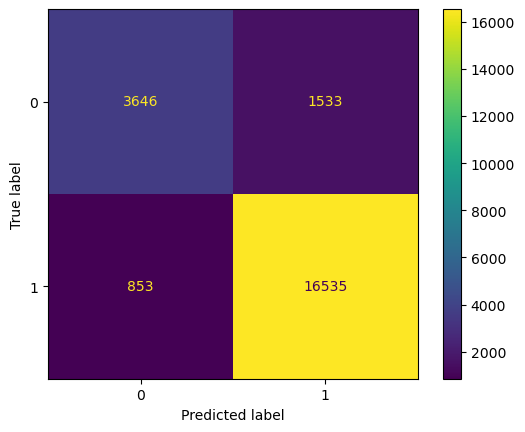

In [144]:
#Confusion matrix
cm = confusion_matrix(yc_val, predcx)
display = ConfusionMatrixDisplay(cm)
display.plot()

### Balanced Bagging Classifier

In [81]:
#to handle imbalanced data
base_estimator = DecisionTreeClassifier()
bbc = BalancedBaggingClassifier(estimator=base_estimator, sampling_strategy='auto', replacement=False, random_state=42)

In [84]:
bbc.fit(Xc_train,yc_train.ravel())
predbb = bbc.predict(Xc_val)

In [85]:
print(classification_report(yc_val, predbb))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81      5108
           1       0.98      0.90      0.94     17459

    accuracy                           0.90     22567
   macro avg       0.85      0.91      0.88     22567
weighted avg       0.92      0.90      0.91     22567



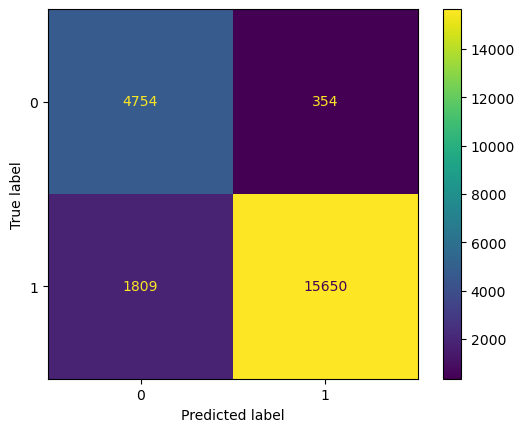

In [86]:
#Confusion matrix
cm = confusion_matrix(yc_val, predbb)
display = ConfusionMatrixDisplay(cm)
display.plot()

In [87]:
#Save model
with open('balancebagging_model.pkl','wb') as f:
    pickle.dump(bbc,f)

In [88]:
# Load model
class_bb_model = pd.read_pickle('balancebagging_model.pkl')
#Test model with test data
predbb_test = class_bb_model.predict(Xc_test)

In [89]:
# Evaluating Score
print(classification_report(yc_test,predbb_test))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82      5223
           1       0.98      0.90      0.94     17345

    accuracy                           0.91     22568
   macro avg       0.85      0.91      0.88     22568
weighted avg       0.92      0.91      0.91     22568



### Testing Model with real data

In [177]:
df_new.loc[[171]]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_year,delivery_year,delivery_month,item_month,item_year_month,delivery_year_month
171,C0BF3187-C4B3-4C63-ABDB-FCB0642A69C0,2021-04-01,8.718789,30223403,78,Lost,W,10,1.0,1500.0,1668701718,2021-07-01,1253.0,2021,2021,7,4,202104,202107


In [183]:
#Loading standard scaler used for training
with open('standard_scalar.pkl','rb') as f:
    sc = pickle.load(f)

#Transforming real data
x = [12, 5, 0, 11, 8.718789, 1.0, 1500.0, 1253.0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
k = np.array([x])
dt = sc.transform(k)

#Loading Balance bagging Model
class_bb_model = pd.read_pickle('\balancebagging_model.pkl')

#Lost Status
pred_status = class_bb_model.predict(dt) 
print(pred_status)

[0]


C:\Users\ACER\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [181]:
df_new.loc[[1]]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_year,delivery_year,delivery_month,item_month,item_year_month,delivery_year_month
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938,25,Won,W,41,0.8,1210.0,1668701718,2021-04-01,1047.0,2021,2021,4,4,202104,202104


In [184]:
#Won status
x = [2, 5, 16, 11, 768.024839, 0.8, 1210.0, 1047.0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
k = np.array([x])
dt = sc.transform(k)
pred_status = class_bb_model.predict(dt) 
print(pred_status)

[1]


C:\Users\ACER\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
